In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [111]:
players_df = pd.read_csv('../datasets/cricket.csv', encoding='unicode_escape')
players_df_1 = players_df[['Ave', 'SR']]

In [112]:
scaler = StandardScaler()
scaled_players_df_1 = scaler.fit_transform(players_df_1)

In [113]:
k_means = KMeans(n_clusters=4, random_state=100)
k_means.fit(scaled_players_df_1)
players_df['cluster_id'] = k_means.labels_
players_df.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [114]:
players_df[players_df['cluster_id'] == players_df[players_df['Player'].str.contains('V Kohli', case=False)]['cluster_id'].iloc[0]]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,3
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,3
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,3


In [115]:
# (high SR, high Ave) - A, 
# (low SR, low Ave) - B, 
# (High SR, Low Ave) - C, 
# (Low SR, High Ave) - D
cluster_to_category = {3: 'A', 2: 'B', 0: 'C', 1: 'D'}
players_df['Category'] = players_df['cluster_id'].map(cluster_to_category).fillna('Unknown')
pd.set_option('display.max_rows', None)
players_df[players_df.Category == 'A']

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Category
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,A
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3,A
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3,A
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3,A
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3,A
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3,A
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,3,A
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,3,A
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,3,A


In [116]:
players_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Category
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,A
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,D
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,D
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,C
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,B


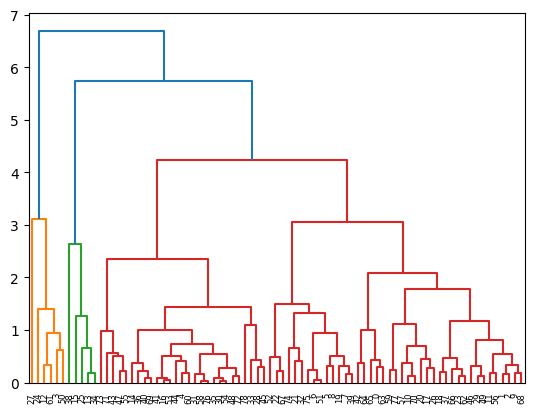

In [119]:
mergings = linkage(scaled_players_df_1, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [125]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1)
players_df['Labels'] = cluster_labels
players_df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,Category,Labels
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,A,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,D,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,D,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,C,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,B,2
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,1,D,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,1,D,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1,D,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1,D,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,1,D,0
